In [62]:
! pip install statsmodels
! pip install scipy
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

In [63]:
df = pd.read_csv ('C:/benzimidazoles/data-benzimidazoles.csv', sep=';')

In [64]:
df=df.set_index('molecules')
#df=df.drop(['Unnamed: 13'],axis=1)
df.head(n=3)

,E,EHOMO,ELUMO,u,GE,EN,Hard,EPh,ETrans,BE,logP,MA,EM,HOF,MR,MW,EE,TE,IE
molecules,,,,,,,,,,,,,,,,,,,
benzimidazole1,"-379,9922251","-6,471190596","-0,856349052","5,3916","5,614841544","3,663769824","2,807420772","0,298833218","0,148932106","20,0248","1,0594","121,002","118,053","206,01","3,7124","118,139","354,72","48,6566","52,76"
benzimidazole2,"-839,6123236","-6,56343792","-0,949412724","5,2017","5,614025196","3,756425322","2,807012598","0,314184803","0,132449473","19,1304","1,771","137,976","152,014","169,93","4,2038","152,584","335,08","40,5897","52,8"
benzimidazole3,"-455,2514963","-6,184380332","-0,579062848","7,5201","5,605317484","3,38172159","2,802658742","0,25502661","0,199503135","22,952","1,0347","127,042","134,048","33,44","3,8655","134,138","210,19","45,8445","68,95"


In [65]:
#Convert string to float variables
data=df.copy()

for column in data.columns:
    data[column] =data[column].apply(lambda x: x.replace(',', '.'))
    data[column]=data[column].astype('float')

In [67]:

#Calculation multicolinearity VIF


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
x=data.copy().drop(['IE'],axis=1)    
y=data['IE'].values



vifMatrix=calc_vif(x)
print(vifMatrix)

   variables           VIF
0          E  6.560305e+02
1      EHOMO           inf
2      ELUMO           inf
3          u  1.149011e+02
4         GE           inf
5         EN           inf
6       Hard           inf
7        EPh  8.436050e+03
8     ETrans  3.340440e+00
9         BE  1.035194e+03
10      logP  5.641774e+01
11        MA  8.218224e+04
12        EM  3.501218e+07
13       HOF  7.889752e+03
14        MR  1.455360e+05
15        MW  3.298209e+07
16        EE  2.313663e+04
17        TE  3.872040e+02


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [68]:
#Calculation of correlation matrix based on R - pearson between [-1,1]

def calc_r_pearson(X,y):


    r = pd.DataFrame()
    r["variables"] = X.columns
    r["RCoef"]=[pearsonr(X[column].values, y)[0] for column in X.columns] 
    r["p_value"]=[pearsonr(X[column].values, y)[1] for column in X.columns]
    
    return(r)


rMatrix=calc_r_pearson(x,y)
print(rMatrix)

   variables     RCoef   p_value
0          E -0.091973  0.699756
1      EHOMO  0.258902  0.270367
2      ELUMO  0.191770  0.417965
3          u -0.138829  0.559406
4         GE -0.216141  0.360058
5         EN -0.266809  0.255479
6       Hard -0.216141  0.360058
7        EPh -0.239703  0.308725
8     ETrans  0.152122  0.522011
9         BE  0.203221  0.390158
10      logP  0.183441  0.438841
11        MA  0.121658  0.609391
12        EM  0.114232  0.631552
13       HOF  0.216557  0.359110
14        MR  0.171899  0.468649
15        MW  0.115341  0.628223
16        EE  0.220319  0.350616
17        TE  0.277885  0.235518


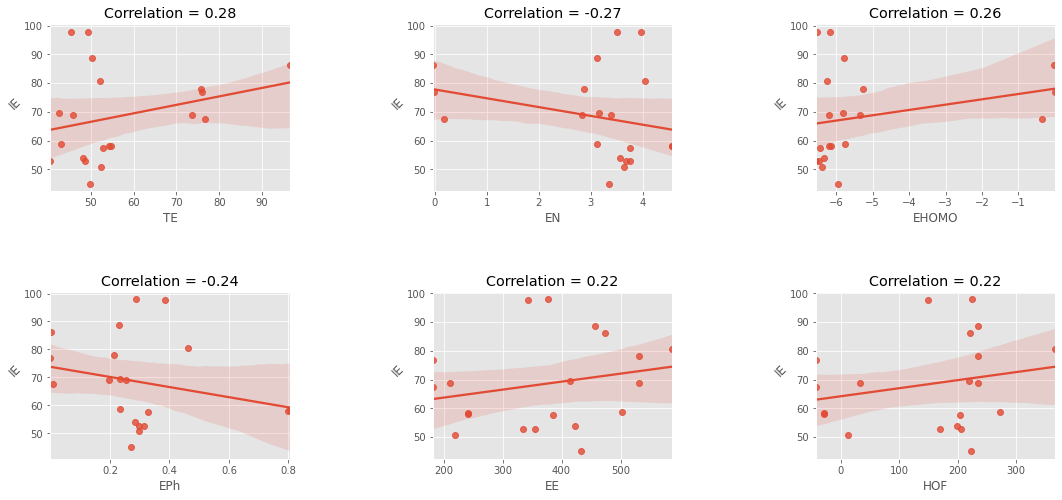

In [83]:
#Here just we will create a scatter plot for best 6 variables the most correlated to IEsxp based on p_value
rMatrix6=rMatrix.sort_values(by='p_value', axis=0, ascending=True)[:6]






fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i,column in zip(range(1,7),rMatrix6['variables'].tolist()):
    ax = fig.add_subplot(2, 3, i)
    ax  = sns.regplot(x=column, y="IE", data=data)
    ax.title.set_text('Correlation = ' + "{:.2f}".format(rMatrix6 [rMatrix6['variables']==column]['RCoef'].tolist()[0]))
    ax.set_xlabel(column, rotation=0)
    ax.set_ylabel("IE", rotation=45)

In [73]:
df1=df.drop(['E','ELUMO','u', 'GE', 'Hard', 'ETrans', 'BE', 'logP', 'MA', 'EM','MR', 'MW', 'IE', 'HOF', 'EE'], axis=1)


df1.head

<bound method NDFrame.head of                         EHOMO            EN          EPh       TE
molecules                                                        
benzimidazole1   -6,471190596   3,663769824  0,298833218  48,6566
benzimidazole2    -6,56343792   3,756425322  0,314184803  40,5897
benzimidazole3   -6,184380332    3,38172159   0,25502661  45,8445
benzimidazole4     -5,8096766   3,146069134   0,23224497  42,5668
benzimidazole5   -6,165876444   3,499139644  0,286960693  45,4456
benzimidazole6    -6,52534168   3,969628208  0,385360788  49,4659
benzimidazole7    -6,39200484   3,625401468  0,296924017  52,4478
benzimidazole8    -6,32805758   3,557100352  0,285392418  48,2191
benzimidazole9   -6,440441488   3,752071466  0,327290332   52,813
benzimidazole10   -6,25322568   4,043099528  0,462265858  52,1111
benzimidazole11  -5,778927492   3,124299854  0,229816826  50,3678
benzimidazole12  -5,948999992    3,35587057  0,271435239  49,7893
benzimidazole13  -6,153359108   4,545969896  0

In [74]:
#Standarazing and scaling data




prepData = StandardScaler (with_mean=True, with_std=True).fit_transform(x)

In [81]:
#Implementing 4 models of regression : SVMregression , Linear Regression,Gradient Boosting , RandomForest :

svmREG=SVR(kernel='rbf',C=1)
linearREG=LinearRegression(fit_intercept=True)
gbtREG= GradientBoostingRegressor ()   
rfREG = RandomForestRegressor()

In [79]:
#calculating RMSE for the 4 models
svmRMSE=(cross_val_score(svmREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean()    
linearRMSE=(cross_val_score(linearREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean() 
gbtRMSE = (cross_val_score(gbtREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean()
rfRMSE=(cross_val_score(rfREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean()   
print(svmRMSE,linearRMSE,gbtRMSE,rfRMSE)


14.61593181352022 29012.95031034156 22.541028699904793 18.285012612082603


In [82]:

#calculating R2 for the two models

svmSCE=np.absolute(cross_val_score(svmREG,x,y,cv=5,scoring='explained_variance')).mean()    
svmSCT=np.absolute(cross_val_score(svmREG,x,y,cv=5,scoring='r2')).mean()    
svmR2=np.round(svmSCE/svmSCT,2)

print(svmR2)

linearSCE=np.absolute(cross_val_score(linearREG,x,y,cv=5,scoring='explained_variance')).mean()    
linearSCT=np.absolute(cross_val_score(linearREG,x,y,cv=5,scoring='r2')).mean()    
linearR2=np.round(linearSCE/linearSCT,2)
print(linearR2)


gbtSCE = np.absolute(cross_val_score(gbtREG,x,y,cv=5,scoring='explained_variance')).mean()    
gbtSCT = np.absolute(cross_val_score(gbtREG,x,y,cv=5,scoring='r2')).mean()    
gbtR2=np.round(gbtSCE/gbtSCT,2)
print(gbtR2)



regrSCE=np.absolute(cross_val_score(rfREG,x,y,cv=5,scoring='explained_variance')).mean()    
regrSCT=np.absolute(cross_val_score(rfREG,x,y,cv=5,scoring='r2')).mean()    
regrR2=np.round(regrSCE/regrSCT,2)
print(regrR2)

0.08
0.71
0.82
0.81
